In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_excel('D://New folder//New folder//CO2 dataset.xlsx')

In [6]:
df.head()

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542


In [7]:
df.tail()

,Year,CO2
210,2010.0,15.6
211,2011.0,15.6
212,2012.0,14.8
213,2013.0,14.7
214,2014.0,15.1


In [8]:
df.duplicated().sum() # Check for duplicates

0

In [9]:
# Convert year into datetime format
# Set year as index
df.index = pd.to_datetime(df['Year'], format='%Y')
df.drop('Year',axis=1, inplace=True)
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 1800-01-01 to 2014-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     215 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [11]:
df.skew() #Positively skewed

CO2    0.362736
dtype: float64

In [12]:
df.isnull().sum() # Check null values

CO2    0
dtype: int64

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO2,215.0,6.74197,6.522437,0.00175,0.04105,6.39,11.5,18.2


In [14]:
len(df[df['CO2']<1]) # 37% CO2 values are less then 1

80

In [15]:
df[df['CO2'] == df['CO2'].max()]  # max CO2 emission in 1979

,CO2
Year,
1979-01-01,18.2


Text(0.5, 1.0, 'CO2 Emissions')

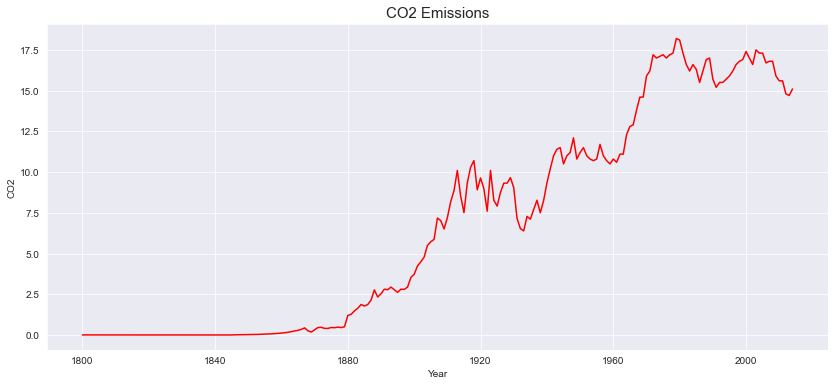

In [16]:
sns.set_style('darkgrid')

plt.figure(figsize=(14,6))
sns.lineplot(data=df["CO2"], color='red')
plt.title('CO2 Emissions', fontsize=15)

<AxesSubplot:xlabel='CO2'>

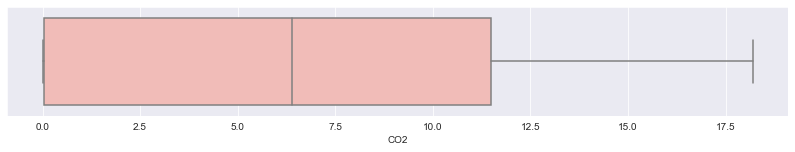

In [17]:
plt.figure(figsize=(14,2))
sns.boxplot(x = df['CO2'], palette='Pastel1')

<AxesSubplot:xlabel='Year'>

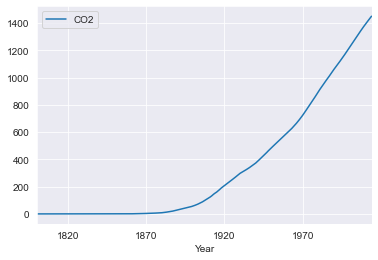

In [18]:
df.cumsum().plot() # rapidly incresing co2 levels

In [19]:
'''df['percent'] = (df['CO2'] / df['CO2'].sum()) * 100
df['percent'].cumsum().plot() # co2 levels 90% incerese after 1970''' 

"df['percent'] = (df['CO2'] / df['CO2'].sum()) * 100\ndf['percent'].cumsum().plot() # co2 levels 90% incerese after 1970"

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

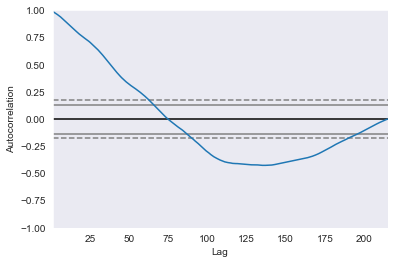

In [20]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['CO2'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

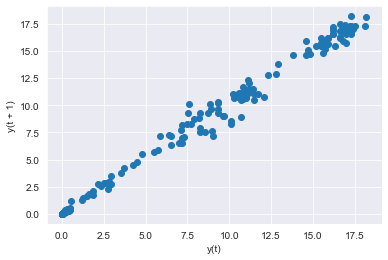

In [21]:
pd.plotting.lag_plot(df) # Lag plot

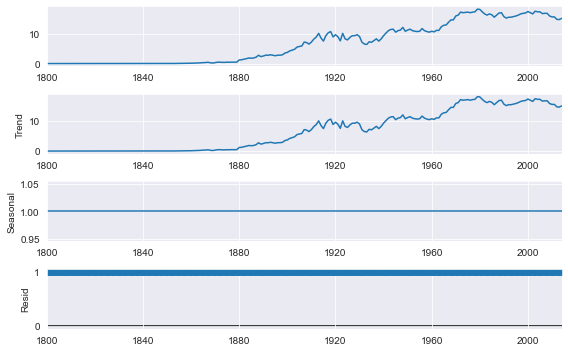

<Figure size 4000x1600 with 0 Axes>

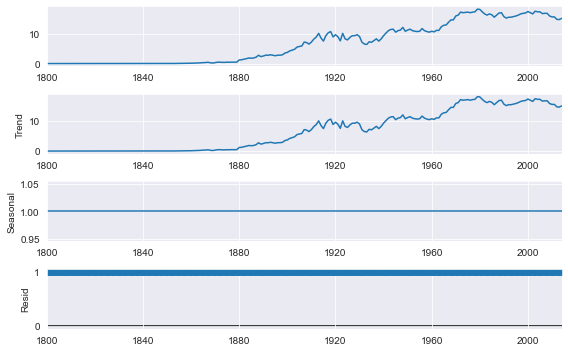

In [22]:
plt.rcParams['figure.figsize'] = 8, 5
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result = seasonal_decompose(df, model='multiplicative')
result.plot()

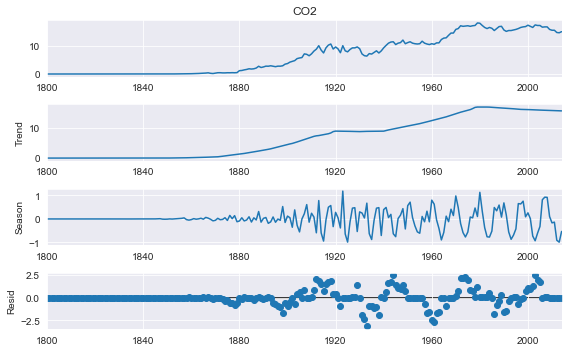

<Figure size 4000x1600 with 0 Axes>

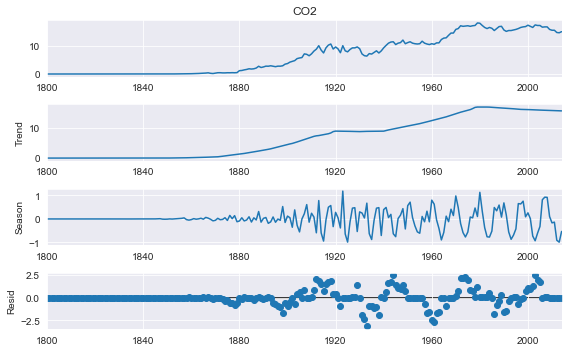

In [24]:
from statsmodels.tsa.seasonal import STL
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')

stl = STL(df.CO2, period=10, robust=True)
res = stl.fit()
res.plot()

Text(0.5, 1.0, 'Trend fitted by linear regression')

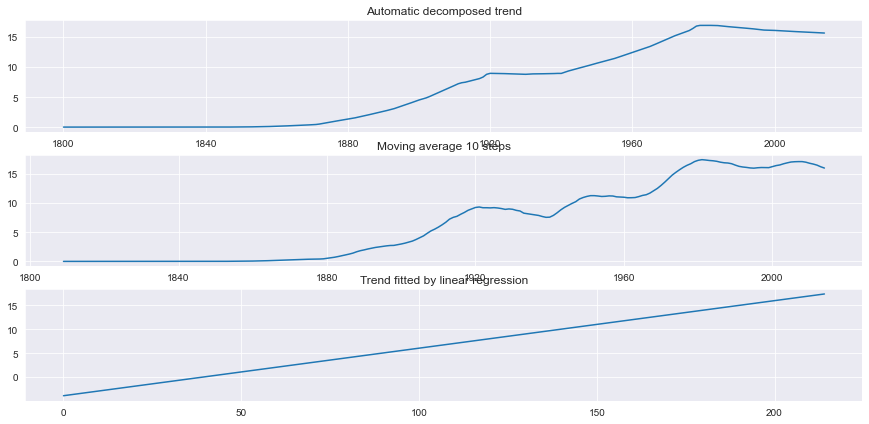

In [26]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
pm_ax.plot(res.trend)
pm_ax.set_title("Automatic decomposed trend")

mm = df.CO2.rolling(10).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving average 10 steps")


X = [i for i in range(0, len(df.CO2))]
X = np.reshape(X, (len(X), 1))
y = df.CO2.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

<AxesSubplot:xlabel='Year'>

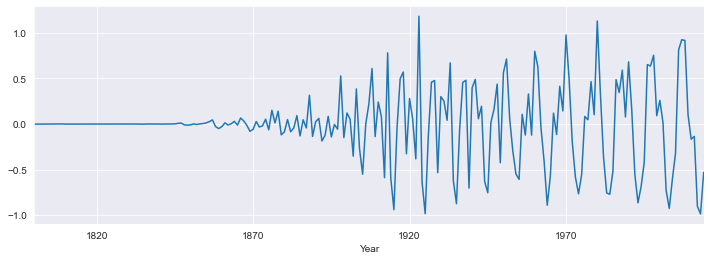

In [27]:
plt.figure(figsize=(12,4))
res.seasonal.plot()

<AxesSubplot:ylabel='Count'>

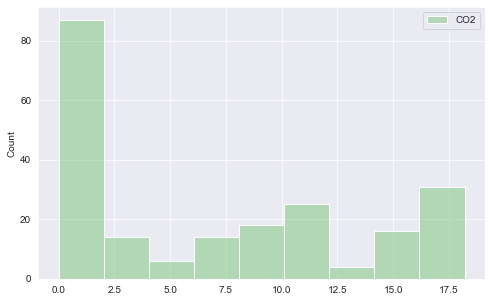

In [28]:
sns.histplot(df, palette='YlGn_r')

<AxesSubplot:ylabel='Density'>

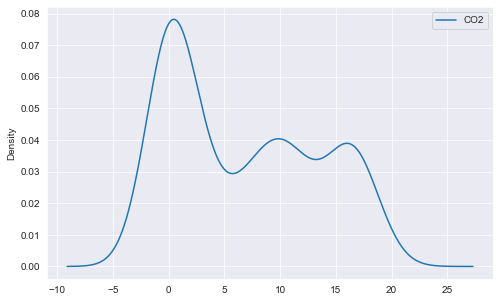

In [29]:
df.plot(kind='kde')

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

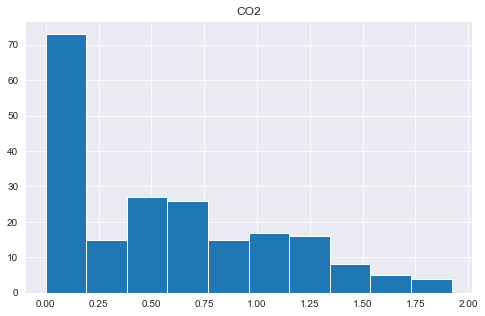

In [30]:
mm = df.rolling(10).std()
mm.hist()

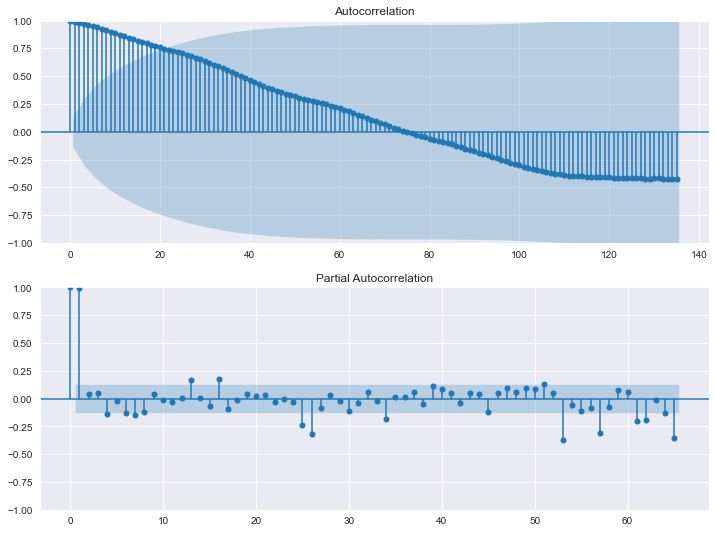

In [31]:
# Autocorrelation and partial auto correlation
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['CO2'],lags=135,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['CO2'],lags=65,ax=ax2, method='yw')

# Smoothing Techniques

Simple Moving Average
Exponantional Moving Average
Simple Exponential Smoothin
Double Exponential Smoothing
Holt's Exponential Smoothing

In [32]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

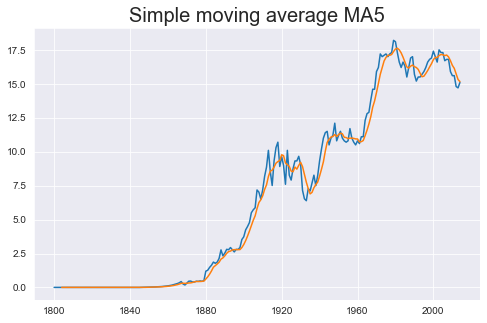

In [33]:
df['MA5'] = df['CO2'].rolling(window=5).mean()

# Plot
plt.title('Simple moving average MA5', size=20)
plt.plot(df['CO2'], label='Original')
plt.plot(df['MA5'], label='MA5')

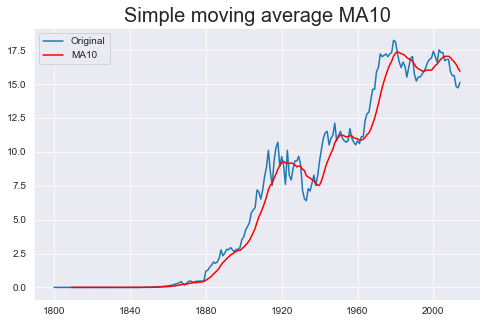

In [34]:
df['MA10'] = df['CO2'].rolling(window=10).mean()

# Plot
plt.title('Simple moving average MA10', size=20)
plt.plot(df['CO2'], label='Original')
plt.plot(df['MA10'], color='red', label='MA10')
plt.legend(); 

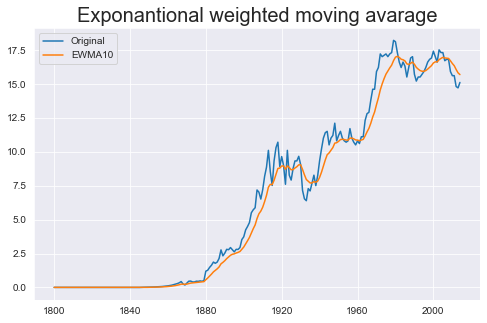

In [35]:
### Exponantional weighted moving avarage(EWMA)

df['EWMA10']=df['CO2'].ewm(span=10,adjust=True).mean()

plt.title('Exponantional weighted moving avarage', size=20)
plt.plot(df['CO2'], label='Original')
plt.plot(df['EWMA10'], label='EWMA10')
plt.legend();

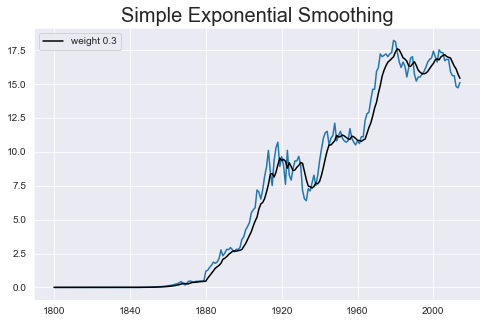

In [36]:
# Simple Exponential Smoothing

fit1 = SimpleExpSmoothing(df.CO2).fit(smoothing_level=0.3, optimized=False)

plt.title('Simple Exponential Smoothing', size=20)
plt.plot(df.CO2)
plt.plot(fit1.fittedvalues, color='black', label = 'weight 0.3')
plt.legend();

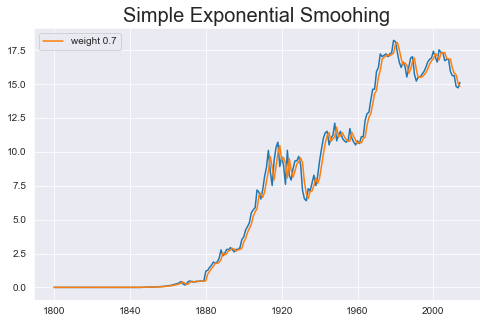

In [37]:
fit2 = SimpleExpSmoothing(df.CO2).fit(smoothing_level=0.7, optimized=False)

plt.title('Simple Exponential Smoohing', size=20)
plt.plot(df.CO2)
plt.plot(fit2.fittedvalues, label = 'weight 0.7')
plt.legend();

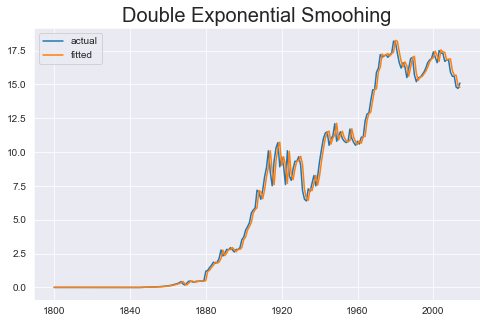

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
doublexp = ExponentialSmoothing(df.CO2, trend='mul').fit()

plt.title('Double Exponential Smoohing', size=20)
plt.plot(df.CO2, label = 'actual')
plt.plot(doublexp.fittedvalues, label = 'fitted')
plt.legend() 

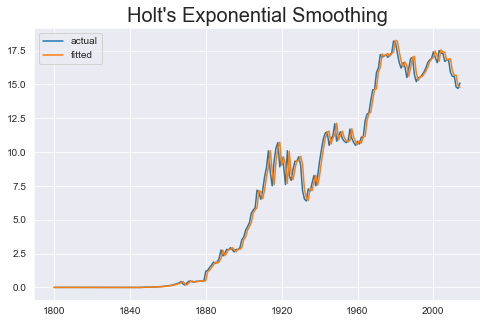

In [39]:
holtfit2 = Holt(df.CO2, exponential=True).fit() # Linear trend

plt.title("Holt's Exponential Smoothing", size=20)
plt.plot(df.CO2, label = 'actual')
plt.plot(holtfit2.fittedvalues, label = 'fitted')
plt.legend();

Augmented Dickey-Fuller test

In [40]:
adfuller(df.CO2) 
# failed to reject Null Hypothesis (HO): Series is non-stationary or series has a unit root.

(-0.3784627751558869,
 0.9136330950336237,
 0,
 214,
 {'1%': -3.4612821203214907,
  '5%': -2.875142613826617,
  '10%': -2.574020122281422},
 342.9453091768805)

In [41]:
kpss(df.CO2)
# Failed to reject Alternate Hypothesis(HA): Series is non-stationary or series has a unit root.

(2.1184039599983184,
 0.01,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

 Making Time Series Stationary

Differencing
a method of transforming a time series

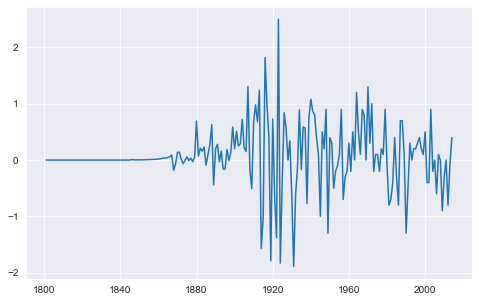

In [42]:
# making the data stationary
df['First Difference'] = df['CO2'] - df['CO2'].shift(1)
plt.plot(df['First Difference'])

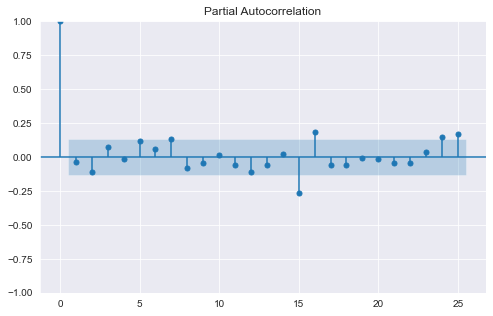

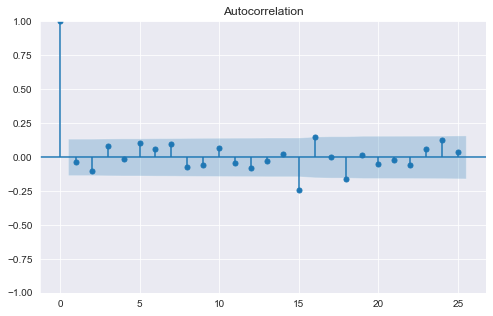

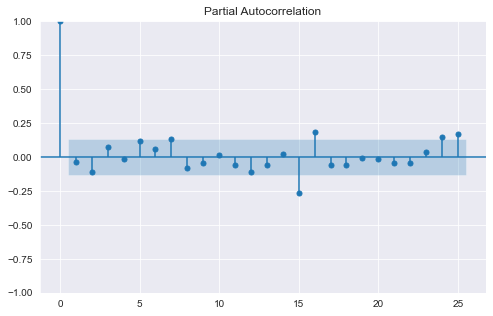

In [43]:
# Acf and Pacf of differenced time series
plot_acf(df['First Difference'].dropna(),lags=25)
plot_pacf(df['First Difference'].dropna(),lags=25)

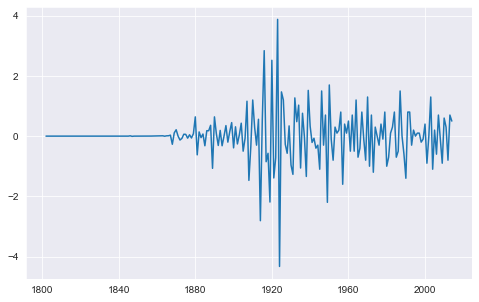

In [44]:
# Second order differencing
df['Second order'] = df['CO2'] - 2*df['CO2'].shift(1) + df['CO2'].shift(2)
plt.plot(df['Second order'])

In [45]:
# Chech stationarity on first lag difference
adfuller(df['First Difference'].dropna()) # HA: Series is stationary

(-3.7800045305842556,
 0.003118649594241994,
 15,
 198,
 {'1%': -3.4638151713286316,
  '5%': -2.876250632135043,
  '10%': -2.574611347821651},
 337.0674484072087)

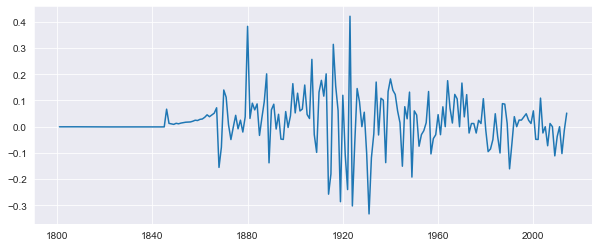

In [46]:
# transformation differencing
plt.figure(figsize=(10,4))
plt.plot(np.sqrt(df.CO2).diff())

Analysis by dividing the data into 5 equal parts

<AxesSubplot:xlabel='Year', ylabel='CO2'>

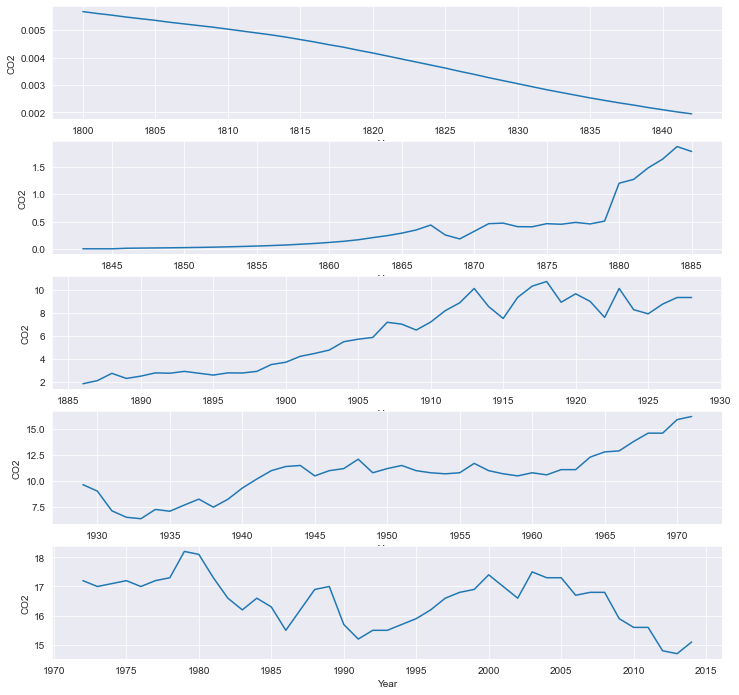

In [47]:
a,b,c,d,f = np.array_split(df, 5) # divide the dataset into 5 equal parts 
plt.figure(figsize=(12,12))
plt.subplot(511)
sns.lineplot(data=a['CO2'])

plt.subplot(512)
sns.lineplot(data=b['CO2'])

plt.subplot(513)
sns.lineplot(data=c['CO2'])

plt.subplot(514)
sns.lineplot(data=d['CO2'])

plt.subplot(515)
sns.lineplot(data=f['CO2'])

 we can see in the very begining the values are decrising and then continuesly incresing over the time. in last few years we can see sligh drop in co2 levels.

 Transformations

Log  transformation
Square root ->  (√x)
Reciprocal transformation 
Log ->  log(x) 
Power transformations

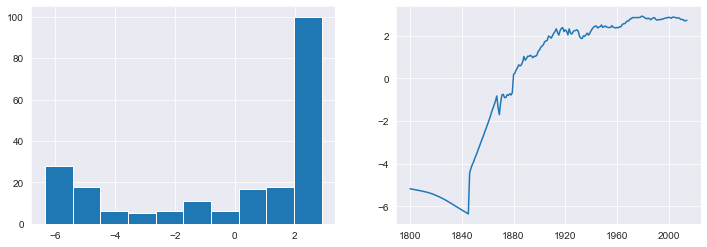

In [48]:
# LOG Transformation

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(np.log(df.CO2)) # log transformation
plt.subplot(122)
plt.plot(np.log(df.CO2))

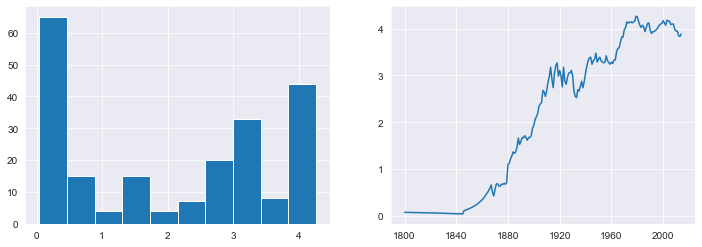

In [49]:
# SQRT Transformation 

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(np.sqrt(df.CO2))
plt.subplot(122)
plt.plot(np.sqrt(df.CO2))

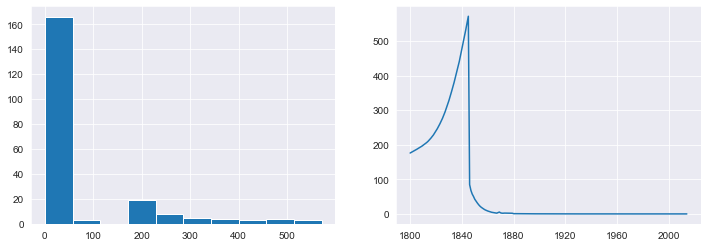

In [50]:
# Reciprocal Transformation 

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(np.reciprocal(df.CO2))
plt.subplot(122)
plt.plot(np.reciprocal(df.CO2))

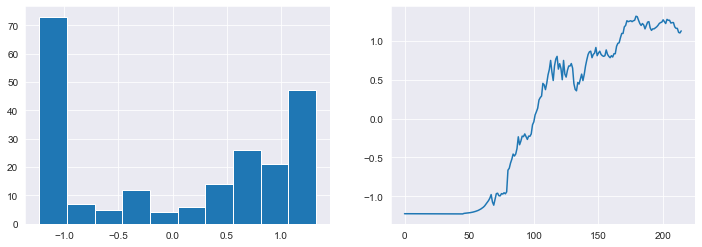

In [51]:
# Power Transformation
from sklearn.preprocessing import power_transform
af = df['CO2'].values.reshape(-1, 1)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(power_transform(af))
plt.subplot(122)
plt.plot(power_transform(af))

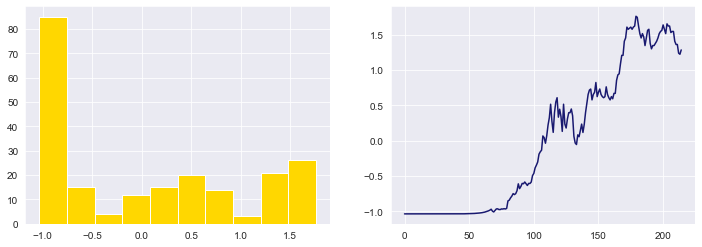

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(af)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(scaled, color='gold')
plt.subplot(122)
plt.plot(scaled, color='midnightblue')

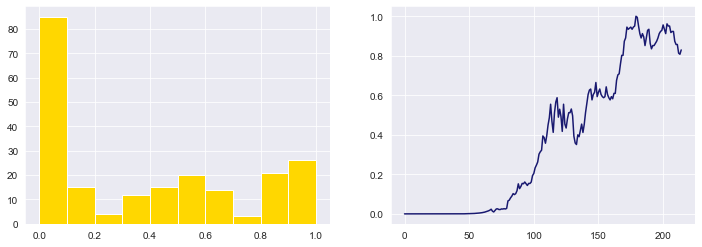

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_1 = scaler.fit_transform(af)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(scaled_1, color='gold')
plt.subplot(122)
plt.plot(scaled_1, color='midnightblue')

Removing some values which is near to 0

In [54]:
new_df = df[df.CO2>0.5]

<AxesSubplot:xlabel='Year'>

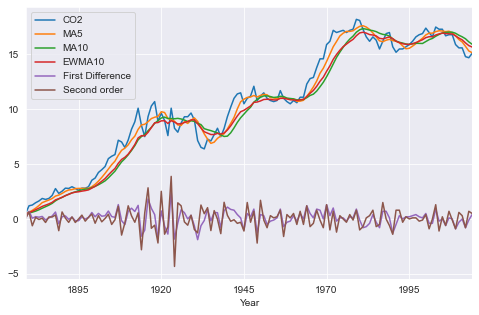

In [55]:
new_df.plot()

Train Test Split

In [56]:
train_data = df.loc[:'2000-01-01','CO2']
test_data = df.loc['2000-01-01':]

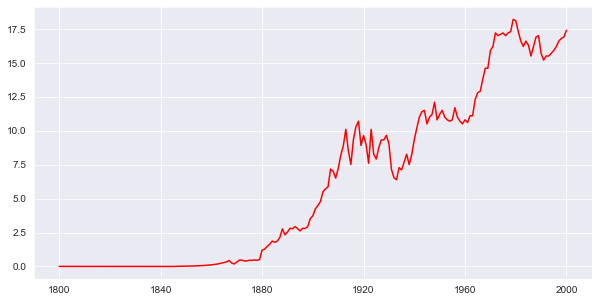

In [57]:
plt.figure(figsize=(10,5))
plt.plot(train_data, color='red')

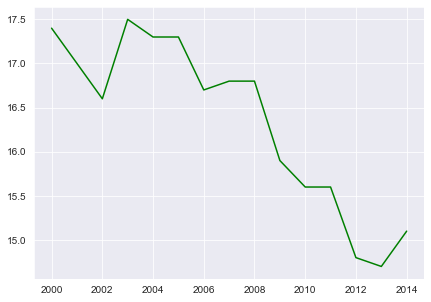

In [58]:
plt.figure(figsize=(7,5))
plt.plot(test_data['CO2'], color = 'green')

Data Driven Models

In [59]:
from statsmodels.tsa.ar_model import AutoReg


# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=15).fit()

# Print Summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  201
Model:                    AutoReg(15)   Log Likelihood                -151.135
Method:               Conditional MLE   S.D. of innovations              0.545
Date:                Sun, 07 Aug 2022   AIC                            336.270
Time:                        21:15:56   BIC                            391.107
Sample:                    01-01-1815   HQIC                           358.492
                         - 01-01-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0844      0.059      1.440      0.150      -0.030       0.199
CO2.L1         0.9461      0.073     12.885      0.000       0.802       1.090
CO2.L2        -0.0682      0.101     -0.675      0.4

RMSE: 2.899389539127096
MAE: 2.4944883862327454


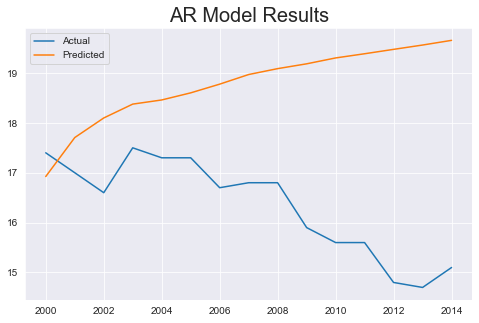

In [60]:
ar_forecast = ar_model.predict('2000-01-01', '2014-01-01')

plt.title('AR Model Results', size=20)
plt.plot(df.loc['2000-01-01':,'CO2'],label='Actual')
plt.plot(ar_forecast,label='Predicted')
plt.legend();

print('RMSE:', np.sqrt(mean_squared_error(df.loc['2000-01-01':,'CO2'],ar_forecast)))
print('MAE:', mean_absolute_error(df.loc['2000-01-01':,'CO2'],ar_forecast))

RMSE: 0.577882181572858
MAE: 0.4887965066595153


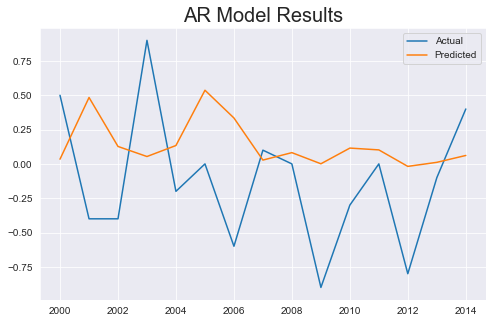

In [63]:
train_datafd = df.loc['1801-01-01':'2000-01-01','First Difference']

# Instantiate and fit the AR model with training data
ar_modelfd = AutoReg(train_datafd, lags=15).fit()

# Print Summary
#print(ar_modelfd.summary())

ar_forecastfd = ar_modelfd.predict('2000-01-01', '2014-01-01')
plt.title('AR Model Results', size=20)
plt.plot(df.loc['2000-01-01':,'First Difference'],label='Actual')
plt.plot(ar_forecastfd,label='Predicted')
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(df.loc['2000-01-01':,'First Difference'],ar_forecastfd)))
print('MAE:',mean_absolute_error(df.loc['2000-01-01':,'First Difference'],ar_forecastfd))

# ARIMA

Model 1

In [64]:
arima = ARIMA(train_data, order=(0, 2 ,0))
results = arima.fit()
predictions = results.predict('2000-01-01', '2014-01-01')

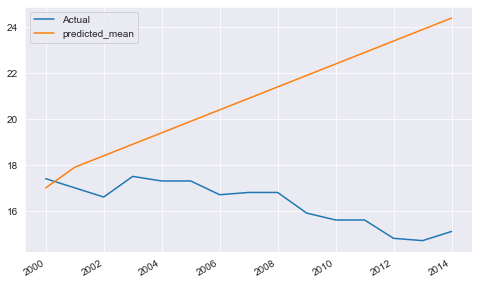

In [65]:
plt.plot(df.loc['2000-01-01':,'CO2'],label='Actual')
predictions.plot()
plt.legend();

In [66]:
print('RMSE',np.sqrt(mean_squared_error(df.loc['2000-01-01':,'CO2'],predictions)))
print('MAE',mean_absolute_error(df.loc['2000-01-01':,'CO2'],predictions))

RMSE 5.474912480274607
MAE 4.586666666666664


Model 2

RMSE: 0.49510491370897197
MAE 0.4410041279908461


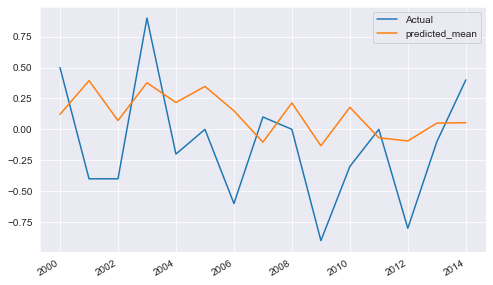

In [67]:
from statsmodels.tsa.arima.model import ARIMA

arima2 = ARIMA(df.loc[:,'First Difference'], order=(15, 1, 2))
results2 = arima2.fit()
predictions2 = results2.predict('2000-01-01', '2014-01-01')

plt.plot(df.loc['2000-01-01':,'First Difference'],label='Actual')
predictions2.plot()
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(df.loc['2000-01-01':,'First Difference'],predictions2)))
print('MAE',mean_absolute_error(df.loc['2000-01-01':,'First Difference'],predictions2))

<AxesSubplot:>

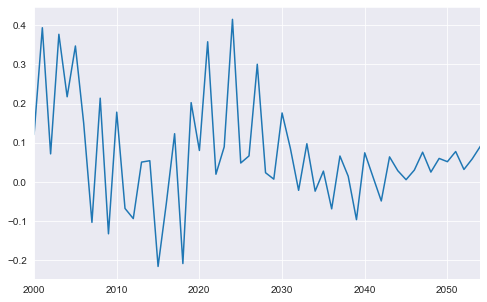

In [68]:
import pickle
with open('arimafoo.pkl', 'wb') as pkl:
    pickle.dump(results2, pkl)
    
with open('arimafoo.pkl', 'rb') as pkl:
    pickle_preds = pickle.load(pkl)
    
start = '2000-01-01'
end = '2054-01-01'
pickle_preds.predict(start, end).plot()

 Model 3

In [69]:
arima3 = ARIMA(df.loc['1803-01-01':'2000-01-01','Second order'], order=(2, 2, 8))
results3 = arima3.fit()
predictions33 = results3.predict('2000-01-01', '2014-01-01')

RMSE: 0.6225600204055299
MAE: 0.5378185674315116


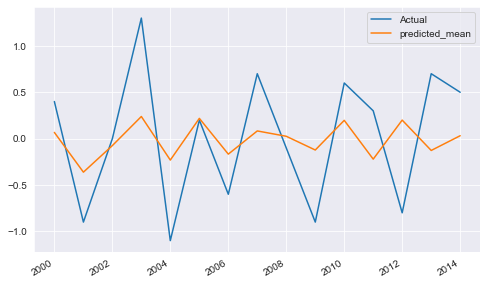

In [70]:
plt.plot(df.loc['2000-01-01':,'Second order'],label='Actual')
predictions33.plot()
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(df.loc['2000-01-01':,'Second order'],predictions33)))
print('MAE:', mean_absolute_error(df.loc['2000-01-01':,'Second order'],predictions33))

Model 4

In [71]:
arima4 = ARIMA(df.loc[:'2000-01-01','Second order'], order=(4, 1, 0))
results4 = arima4.fit()
predictions4 = results4.predict('2000-01-01', '2014-01-01')

RMSE: 0.678453363008452
MAE: 0.5804775360463782


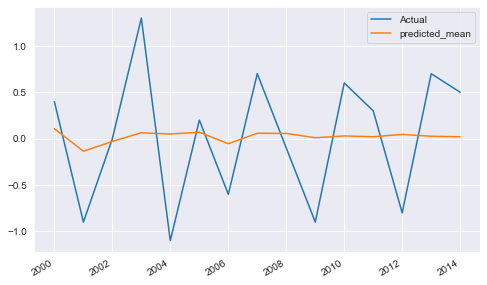

In [72]:
plt.plot(df.loc['2000-01-01':,'Second order'],label='Actual')
predictions4.plot()
plt.legend();

print('RMSE:', np.sqrt(mean_squared_error(df.loc['2000-01-01':,'Second order'],predictions4)))
print('MAE:', mean_absolute_error(df.loc['2000-01-01':,'Second order'],predictions4))

Simple Linear Model

In [77]:
df['t'] = range(1,216)
df['t_square'] = df['t']**2
df.reset_index(inplace=True)

In [78]:
train = df.head(200)
test = df.tail(15)

RMSE: 1.4378779595679616
MAE: 1.1403177593479845


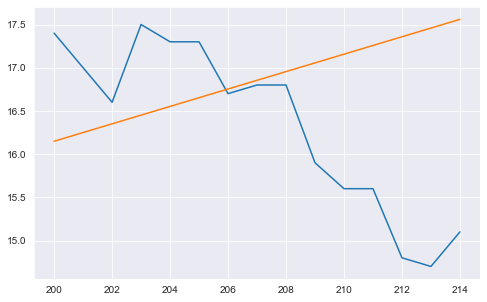

In [79]:
import statsmodels.formula.api as smf 
from sklearn.metrics import mean_absolute_percentage_error

linear_model = smf.ols('CO2~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))

plt.plot(test.CO2)
plt.plot(pred_linear)

print('RMSE:', np.sqrt(mean_squared_error(test.CO2,pred_linear)))
print('MAE:', mean_absolute_error(test.CO2,pred_linear))

Simple Exponential Method

RMSE: 0.9403040003421604
MAE: 0.8411463070561953


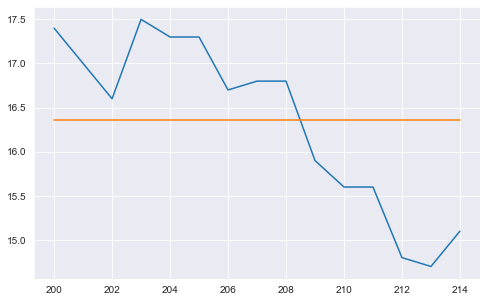

In [80]:
ses_model = SimpleExpSmoothing(train["CO2"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])

plt.plot(test.CO2)
plt.plot(pred_ses)

print('RMSE:', np.sqrt(mean_squared_error(test.CO2,pred_ses)))
print('MAE:', mean_absolute_error(test.CO2,pred_ses))

Holt method

RMSE: 2.2841146684762053
MAE: 1.7579330878827946


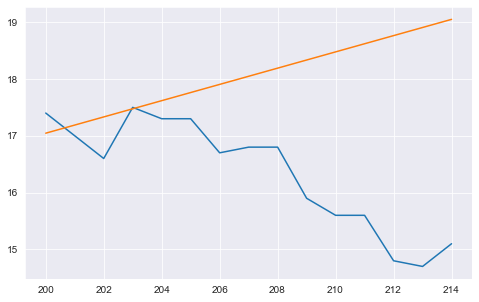

In [81]:
hw_model = Holt(train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])

plt.plot(test.CO2)
plt.plot(pred_hw)

print('RMSE:', np.sqrt(mean_squared_error(test.CO2,pred_hw)))
print('MAE:', mean_absolute_error(test.CO2,pred_hw))

 Holts winter exponential smoothing with additive seasonality and additive trend

RMSE: 1.7988138434804108
MAE: 1.351836747672247


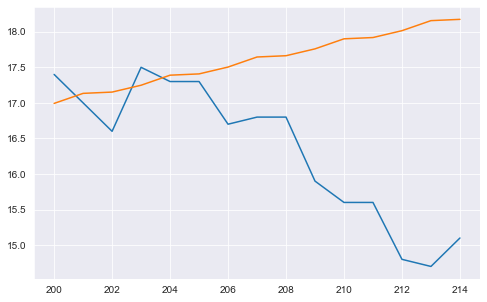

In [82]:
hwe_model_add_add = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=3).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])

plt.plot(test.CO2)
plt.plot(pred_hwe_add_add)

print('RMSE:', np.sqrt(mean_squared_error(test.CO2,pred_hwe_add_add)))
print('MAE:', mean_absolute_error(test.CO2,pred_hwe_add_add))

Quadratic method

RMSE: 4.902995859368265
MAE: 4.567318830457361


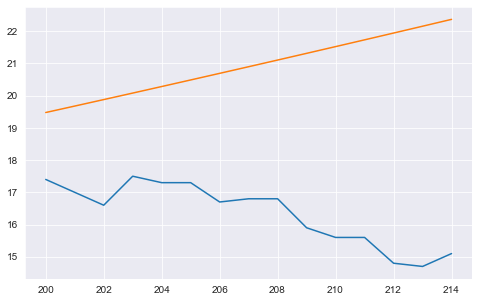

In [83]:
Quad = smf.ols('CO2~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_square"]]))

plt.plot(test.CO2)
plt.plot(pred_Quad)

print('RMSE:', np.sqrt(mean_squared_error(test.CO2,pred_Quad)))
print('MAE:', mean_absolute_error(test.CO2,pred_Quad))

Ridge and Lasso method

RMSE: 1.4378715675817813
MAE: 1.140313965417573


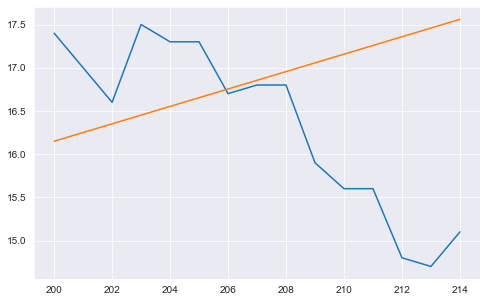

In [84]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
ridge.fit(np.array(train['t']).reshape(-1, 1), train.CO2)

test['ridgecv_pred'] = ridge.predict(np.array(test['t']).reshape(-1, 1))

plt.plot(test.CO2)
plt.plot(test['ridgecv_pred'])

print('RMSE:', np.sqrt(mean_squared_error(test.CO2,test.ridgecv_pred)))
print('MAE:', mean_absolute_error(test.CO2,test.ridgecv_pred))

RMSE: 1.4254999894234845
MAE: 1.132787571093277


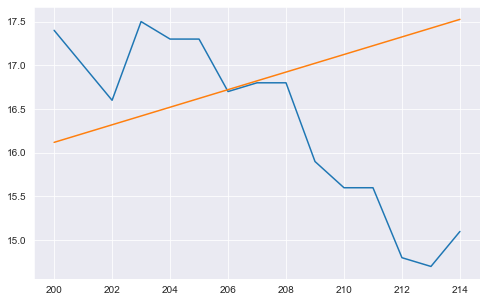

In [85]:
lasso = Lasso()
lasso.fit(np.array(train['t']).reshape(-1, 1), train.CO2)

test['lasso_pred'] = lasso.predict(np.array(test['t']).reshape(-1, 1))

plt.plot(test.CO2)
plt.plot(test['lasso_pred'])

print('RMSE:', np.sqrt(mean_squared_error(test.CO2,test.lasso_pred)))
print('MAE:', mean_absolute_error(test.CO2,test.lasso_pred))